In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, ConfusionMatrixDisplay
import numpy as np
from sklearn.model_selection import train_test_split


In [11]:
df.head()

,Unnamed: 0,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,M,Dangerous,152,239,N,N,158,Y,3.6,Flat,2,7,Presence
1,1,52,M,Light,125,325,N,P,171,N,0.0,Upsloping,0,3,Absence
2,2,56,F,Common,160,188,N,P,151,N,0.0,Upsloping,0,3,Absence
3,3,44,F,Hard,134,229,N,P,150,N,1.0,Flat,0,3,Absence
4,4,58,M,Dangerous,140,234,N,P,125,Y,3.8,Flat,3,3,Presence


In [13]:
df = pd.read_csv('df_att.csv')
X = df.drop(['Heart Disease', 'Unnamed: 0'], axis = 1)
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model  =  CatBoostClassifier(iterations=500,
                             learning_rate=0.05,
                             depth=6,
                             loss_function='Logloss',
                             eval_metric='AUC', 
                             verbose=100)


In [18]:
cat_features = list(X_train.select_dtypes(exclude='number').columns)
print(cat_features)

model.fit(X_train, y_train, cat_features=cat_features)

['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST']
0:	total: 626ms	remaining: 5m 12s
100:	total: 27.5s	remaining: 1m 48s
200:	total: 51.2s	remaining: 1m 16s
300:	total: 1m 15s	remaining: 50.1s
400:	total: 1m 40s	remaining: 24.8s
499:	total: 2m 5s	remaining: 0us


In [19]:
model.get_best_score()

{'learn': {'Logloss': 0.2664234644792811}}

In [21]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8872698412698413

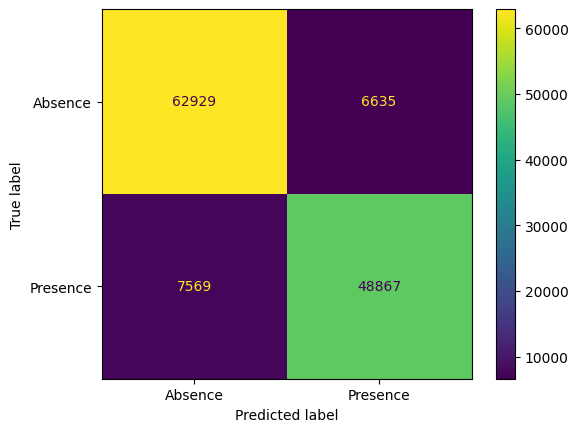

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
